# Machine Hack Hackathon : Predicting Video games Sales 

__My key learning points:__\
handling categorical data in python \
Visualizations in python\
Dimension reduction and feature selection in python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [12]:
file = "C:/Users/iutti/Documents/Data Science/projects/Data/Data/Train.csv"

df = pd.read_csv(file)
df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


## Label Encoding 

In [31]:
X = df.iloc[:,[0,1,2,3,5,6,7]].values
y = df.iloc[:,8].values

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in [1,3,4]:
    X[:,i] = le.fit_transform(X[:,i])

In [68]:
le.classes_

array(['E', 'E10+', 'K-A', 'M', 'RP', 'T'], dtype=object)

## One Hot Encoding using scikit learn  OneHotEncoder()

In [73]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features = [1,3,4])
ohe_df = ohe.fit_transform(X).toarray()
ohe_df = pd.DataFrame(ohe_df,columns = ohe.classes_)

C:\Users\iutti\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\iutti\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


AttributeError: 'OneHotEncoder' object has no attribute 'classes_'

In [45]:
ohe_df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2860.0,2008.0,2.833333,0.303704
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,731.0,2012.0,13.200000,1.640000
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,495.0,2019.0,4.562500,0.006410
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2641.0,2002.0,4.181818,0.326923
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,811.0,2013.0,2.259259,0.032579


## Using LabelBinarizer ()

In [72]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

df_ohe = df.copy()

X_ohe = lb.fit_transform(df_ohe['CONSOLE'])
X_ohe = pd.DataFrame(X_ohe, columns = lb.classes_)
X_ohe.head()

,3ds,dc,ds,gba,gc,pc,ps,ps2,ps3,ps4,psp,psv,wii,wiiu,x,x360,xone
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Using pandas get_dummies()

In [85]:
df_oh = df.copy()

#df_oh.CONSOLE = df.CONSOLE.astype('str')
df_oh = pd.get_dummies(df_oh,columns=['CONSOLE','RATING','CATEGORY'], prefix = ['CONSOLE','RATING','CATEGORY'])
df_oh.head()

,ID,YEAR,PUBLISHER,CRITICS_POINTS,USER_POINTS,SalesInMillions,CONSOLE_3ds,CONSOLE_dc,CONSOLE_ds,CONSOLE_gba,...,CATEGORY_fighting,CATEGORY_misc,CATEGORY_platform,CATEGORY_puzzle,CATEGORY_racing,CATEGORY_role-playing,CATEGORY_shooter,CATEGORY_simulation,CATEGORY_sports,CATEGORY_strategy
0,2860,2008,Nintendo,2.833333,0.303704,1.779257,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,731,2012,Konami Digital Entertainment,13.200000,1.640000,0.215050,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,495,2019,Activision,4.562500,0.006410,0.534402,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2641,2002,Electronic Arts,4.181818,0.326923,1.383964,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,811,2013,Activision,2.259259,0.032579,0.082671,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## MDS

In [60]:
from sklearn.manifold import MDS
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scale',StandardScaler()),
                ('mds', MDS(n_components = 2, max_iter = 100))])


x_new = pipe.fit_transform(ohe_df.values)

No handles with labels found to put in legend.


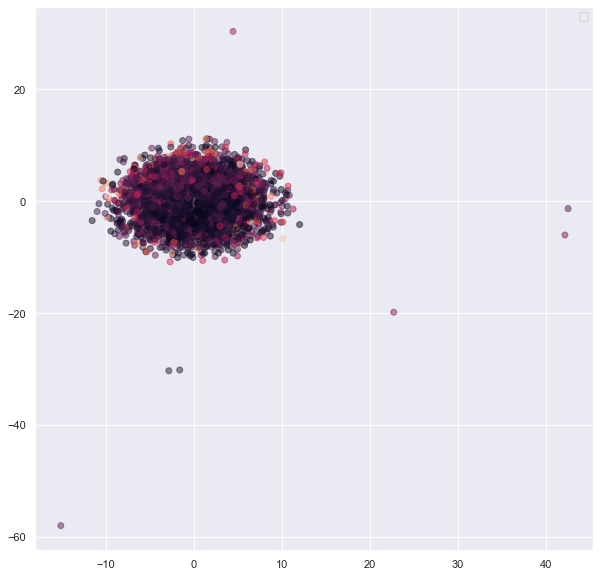

In [61]:
plt.figure(figsize = (10,10))
plt.scatter(x_new[:,0],x_new[:,1], c= X[:,5], alpha = 0.5)
plt.legend()

In [125]:
np.where(x_new[:,0] > 20)

(array([ 374,  748, 1810], dtype=int64),)

In [130]:
np.where(x_new[:,1] < -20)

(array([239, 286, 447], dtype=int64),)

In [131]:
np.where(x_new[:,1] > 20)

(array([2477], dtype=int64),)

In [139]:
df_oh_outliers = df_oh.drop(index = [374,748,1810,239,286,447,2477], axis = 0)

In [140]:
X = df_oh_outliers.drop(columns = ['ID','SalesInMillions','PUBLISHER'], axis = 1).values
y = df_oh_outliers.SalesInMillions.values
X.shape

(3499, 38)

In [ ]:
np.where(X)

## Modelling 

In [ ]:
# plan

# feature selection : wrapper and filters
# xgboost
# support vector regressor(?)
# random forest
# Elastic Nets 
# Ensemble model

# wrapper method:  Random Forest 
# to get an idea about the complexity of the problem
# and feature importances

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [142]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

errors = np.sqrt(np.mean((y_test-y_pred)**2))

In [143]:
errors

1.8373225998958784

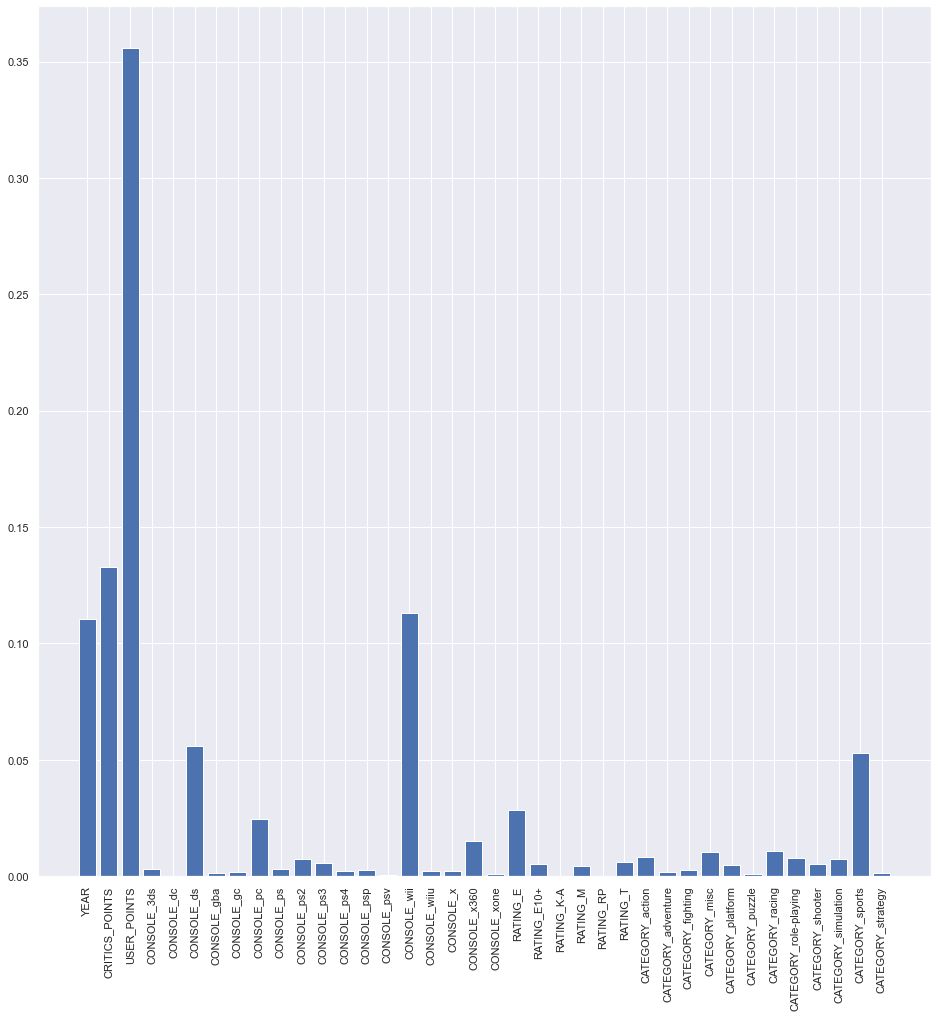

In [144]:
importances = list(rf.feature_importances_)
labels = df_oh_outliers.drop(columns = ['ID','PUBLISHER','SalesInMillions'], axis =1 ).columns

imp = {f:i for f,i in zip(labels,importances)}

plt.bar(imp.keys(),imp.values())
plt.xticks(rotation = 90)
plt.show()
#plt.bar(list(range(len(importances))),importances)

In [147]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.80*(1-0.80))
#X_transformed = sel.fit_transform(X_train)
#X_transformed.shape

X_trans = sel.fit(X_train,y_train)
sel.variances_
tol = 0.80*(1-0.80)
idx = np.where(sel.variances_ >tol)
idx[0]

array([ 0,  1,  2, 20, 23, 25, 26], dtype=int64)